# Unsupervised Learning with K-means

In [1]:
# Import required resources
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import pandas as pd # for exploring our data
import matplotlib.pyplot as plt # for plotting our clusters
from mpl_toolkits.mplot3d import Axes3D # Specifically for creating a 3-D graph

In [2]:
# Load the Iris dataset:
iris = load_iris()
# Assign the data to a variable so we can start to use it:
iris_data = iris.data

In [3]:
# Convert the dataset to a pandas data frame for analysis:
iris_df = pd.DataFrame(iris_data)
# Use the info() function to get some information about the dataset
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
# Preview the data
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(iris_data)
kmeans_model.predict(iris_data)
labels = kmeans_model.labels_

Text(0.5, 0, 'Sepal width')

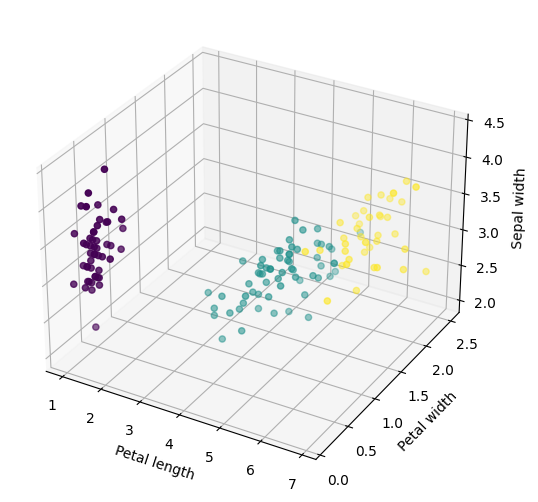

In [6]:
# Create a figure object:
fig = plt.figure() 
# Define the axes (note: the auto_add_to_figure option will default to False from mpl3.5 onwards):
axes = Axes3D(fig, auto_add_to_figure=False) 
# Add the axes to the figure:
fig.add_axes(axes) 
# Create the scatter plot to graph the outputs from our K-means model:
axes.scatter(iris_data[:, 2], iris_data[:, 3], iris_data[:, 1], c=labels.astype(float)) 
# Set the labels for the X, Y, and Z axes:
axes.set_xlabel("Petal length") 
axes.set_ylabel("Petal width") 
axes.set_zlabel("Sepal width")  

# Supervised Learning: Linear Regression with scikit-learn

In [7]:
# Import necessary resources
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [8]:
# Set the target variable
target = iris_df[[2]]

In [9]:
# Define the input_features
input_feats = iris_df[[0, 1, 3]]

In [10]:
# Split the dataset for training and testing
input_train, input_test, target_train, target_test=train_test_split(input_feats,target,test_size=0.2)

In [11]:
# Create an instance of a LinearRegression model
lreg_model = LinearRegression()

# Train the model by fitting it to the training data
lreg_model.fit(input_train,target_train)

# Use the test set to generate predictions
target_predictions=lreg_model.predict(input_test)

In [12]:
# Preview the predictions in a pandas data frame
pred_df = pd.DataFrame(target_predictions[0:5])
pred_df.head()

,0
0,4.660123
1,1.758042
2,5.996929
3,1.532188
4,6.384125


In [13]:
# Preview the known, correct answers
target_test.head()

,2
149,5.1
26,1.6
102,5.9
44,1.9
105,6.6


In [14]:
# Calculate the Mean Squared Error (MSE)
mean_squared_error(target_test,target_predictions)

0.11185385595037473

# Supervised Learning: Multi-class Classification with XGBoost

In [15]:
# Import required resources
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [16]:
# Assign the target variable
iris_classes = iris.target

In [17]:
# View the classes
iris_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [18]:
# Split the data for training and testing
xgb_input_train, xgb_input_test, xgb_target_train, xgb_target_test = train_test_split(iris_data, iris_classes, test_size=.2)

In [19]:
# create model instance
xgbc = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='multi:softmax')

In [20]:
# Train the model
xgbc.fit(xgb_input_train, xgb_target_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
# make predictions
xgb_predictions = xgbc.predict(xgb_input_test)

In [22]:
# View the predictions
xgb_predictions

array([0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 2, 1, 1, 1, 1])

In [23]:
# View the known, correct answers
xgb_target_test

array([0, 2, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1])

In [24]:
# Calculate the accuracy of the predictions
accuracy_score(xgb_target_test,xgb_predictions)

0.9333333333333333